In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
student_mat = pd.read_csv('/content/drive/MyDrive/CMPE255/student_dataset/student-mat.csv',sep=';')
student_por = pd.read_csv('/content/drive/MyDrive/CMPE255/student_dataset/student-por.csv',sep=';')

In [4]:
student_mat.shape

(395, 33)

In [5]:
student_por.shape

(649, 33)

In [6]:
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [8]:
'''
keys = ["school","sex","age","address","famsize","Pstatus",
        "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
student_merge = pd.merge(student_mat, student_por, on=keys)
print(len(student_merge))
print(student_merge.columns)
'''

'\nkeys = ["school","sex","age","address","famsize","Pstatus",\n        "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]\nstudent_merge = pd.merge(student_mat, student_por, on=keys)\nprint(len(student_merge))\nprint(student_merge.columns)\n'

In [9]:
passing_students_por = student_por[student_por['G3'] >= 12]
print(len(passing_students_por))

348


In [10]:
student_por['target'] = student_por['G3'].apply(lambda x: 1 if x >= 12 else 0)
student_por = student_por.drop('G3',axis=1)

In [11]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1


In [12]:
student_por.shape

(649, 33)

In [13]:
#checking for missing values
print(student_por.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
target        0
dtype: int64


In [14]:
num_duplicates = student_por.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [15]:
print("Columns of portugese data \n", student_por.columns)

Columns of portugese data 
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'target'],
      dtype='object')


In [16]:
#performing statistical description of portuguese data
print("The statistical description of data \n",student_por.describe())

The statistical description of data 
               age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3

In [17]:
student_por.groupby('sex').size() #finding number of male and female students for portuguese data

,0
sex,
F,383
M,266


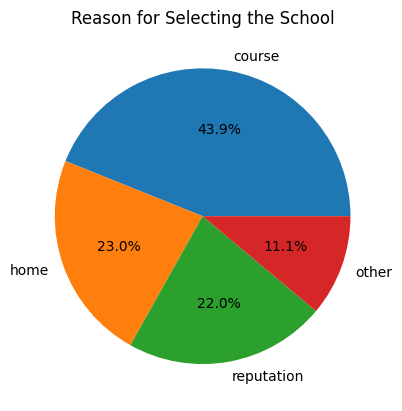

In [18]:
#what might be the reason for the student to choose the school

import matplotlib.pyplot as plt
count_of_reason = student_por['reason'].value_counts()
count_of_reason.plot(kind='pie', autopct='%1.1f%%')
plt.title("Reason for Selecting the School")
plt.ylabel("")  # Hide y-label in pie chart
plt.show()

Export Readjusted Portuguese Class Dataset

In [ ]:
student_por.to_csv('fixed_student_por.csv', index=False)